# L2: Perturbation analysis and other methods to interpret models

In [1]:
import numpy as np

import shap

X, y = shap.datasets.adult()

In [2]:
X.sample(5)

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
524,44.0,4,10.0,0,7,1,4,1,0.0,0.0,58.0,39
2954,26.0,4,9.0,4,7,1,2,0,0.0,0.0,40.0,39
683,23.0,2,10.0,5,4,1,2,1,0.0,0.0,40.0,39
17820,54.0,6,9.0,6,3,0,4,1,0.0,2001.0,35.0,39
4590,26.0,4,13.0,2,12,4,4,1,4064.0,0.0,50.0,39


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=7)

In [4]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [5]:
knn.score(X_valid, y_valid)

0.8464609243052357

In [ ]:
# Check most wrong predictions

In [6]:
predictions = knn.predict_proba(X_valid)
hard_predictions = np.where(predictions > 0.5, 1, 0)[:, 1]

In [7]:
top_fuckups = predictions[y_valid != hard_predictions][:, 1]

In [8]:
top_10_fuckup_ids = list(sorted(((idx, top_fuckups[idx])
                              for idx in range(len(top_fuckups))
                                  if top_fuckups[idx] > top_fuckups.mean()),
                          key=lambda x: x[1], reverse=True))[:10]

In [9]:
top_10_fuckup_ids

[(20, 1.0),
 (44, 1.0),
 (113, 1.0),
 (190, 1.0),
 (219, 1.0),
 (233, 1.0),
 (259, 1.0),
 (273, 1.0),
 (274, 1.0),
 (293, 1.0)]

In [10]:
X_valid.iloc[[idx for idx, _ in top_10_fuckup_ids]]

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
22264,31.0,4,10.0,4,12,2,4,0,0.0,0.0,40.0,0
20764,30.0,1,13.0,4,10,0,4,1,0.0,1876.0,40.0,39
9220,55.0,4,9.0,5,1,0,4,0,0.0,0.0,40.0,39
23183,39.0,2,9.0,2,3,4,4,1,0.0,0.0,40.0,39
22932,23.0,4,9.0,4,8,0,2,1,0.0,0.0,30.0,39
29130,17.0,4,5.0,4,8,3,4,1,0.0,0.0,16.0,39
10266,56.0,5,5.0,2,14,4,4,1,0.0,0.0,99.0,39
4881,25.0,4,13.0,4,3,0,4,1,0.0,0.0,40.0,26
66,28.0,4,10.0,0,1,0,4,0,0.0,0.0,40.0,39
8656,36.0,6,13.0,0,8,1,2,1,0.0,0.0,45.0,39


## Input alterations for model verification

In [ ]:
# counterfactuals, altering things that should affect predictions

In [41]:
example = X_train.iloc[0]
print(f"Earns over 50k?", y_train[0])
example

Earns over 50k? False


Age               51.0
Workclass          4.0
Education-Num     10.0
Marital Status     0.0
Occupation         6.0
Relationship       0.0
Race               4.0
Sex                0.0
Capital Gain       0.0
Capital Loss       0.0
Hours per week    40.0
Country           21.0
Name: 12011, dtype: float64

In [43]:
knn.predict([example])

array([False])

In [45]:
example["Hours per week"] = example["Hours per week"] * 1.25


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [47]:
knn.predict([example])

array([ True])

In [66]:
example = X_train.iloc[0]
print(f"Earns over 50k?", y_train[0])
print(example)

print(knn.predict([example]))

example["Age"] = 80

knn.predict([example])

Earns over 50k? False
Age               51.0
Workclass          4.0
Education-Num     10.0
Marital Status     0.0
Occupation         6.0
Relationship       0.0
Race               4.0
Sex                0.0
Capital Gain       0.0
Capital Loss       0.0
Hours per week    40.0
Country           21.0
Name: 12011, dtype: float64
[False]



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([False])

In [67]:
example = X_train.iloc[0]
print(f"Earns over 50k?", y_train[0])
print(example)

print(knn.predict([example]))

example["Age"] = 65

knn.predict([example])

Earns over 50k? False
Age               51.0
Workclass          4.0
Education-Num     10.0
Marital Status     0.0
Occupation         6.0
Relationship       0.0
Race               4.0
Sex                0.0
Capital Gain       0.0
Capital Loss       0.0
Hours per week    40.0
Country           21.0
Name: 12011, dtype: float64
[False]



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([ True])

In [ ]:
# random alterations, altering things that shouldn't affect predictions

In [48]:
example = X_train.iloc[0]
print(f"Earns over 50k?", y_train[0])
example

Earns over 50k? False


Age               51.0
Workclass          4.0
Education-Num     10.0
Marital Status     0.0
Occupation         6.0
Relationship       0.0
Race               4.0
Sex                0.0
Capital Gain       0.0
Capital Loss       0.0
Hours per week    40.0
Country           21.0
Name: 12011, dtype: float64

In [49]:
knn.predict([example])

array([False])

In [50]:
example.Sex = not example.Sex


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [51]:
knn.predict([example])

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


array([False])

## ML Interpretability for model verification (PDP/ICE plots, Local Surogate Models, Additive explanations)

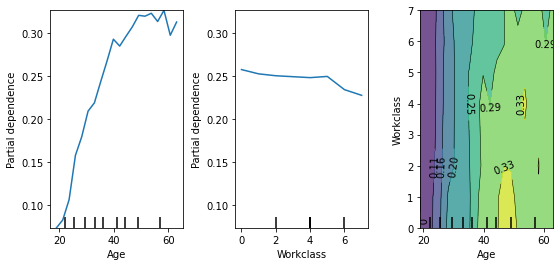

In [29]:
from sklearn.inspection import plot_partial_dependence
import matplotlib.pyplot as plt


_, ax = plt.subplots(ncols=3, figsize=(9, 4))

features = [0, 1, (0, 1)] # first two are individual features, third allows the analysis of feature interaction
display = plot_partial_dependence(knn, X[:1000], features, n_jobs=4,
                                  subsample=50, grid_resolution=20, ax=ax)

display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)

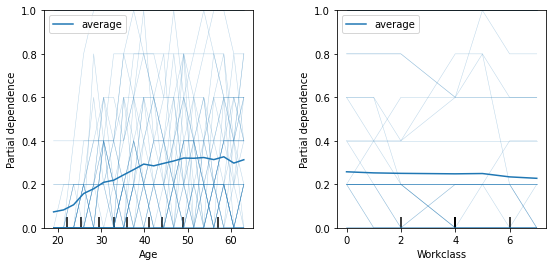

In [31]:
_, ax = plt.subplots(ncols=2, figsize=(9, 4))

display = plot_partial_dependence(knn, X[:1000], [0, 1], n_jobs=4,
                        kind="both", subsample=50, grid_resolution=20, ax=ax)

display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)

In [32]:
# SHAP

In [13]:
import shap


predict_func = lambda x: knn.predict_proba(x)[:,1]
medians = X_train.median().values.reshape((1, X_train.shape[1]))

explainer = shap.Explainer(predict_func, medians)
shap_values = explainer(X_valid.iloc[0:1000, :])

Permutation explainer: 1001it [01:01, 14.47it/s]                         


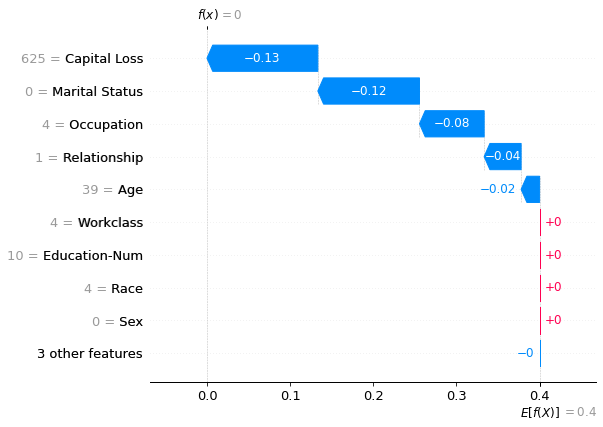

In [14]:
shap.plots.waterfall(shap_values[0])

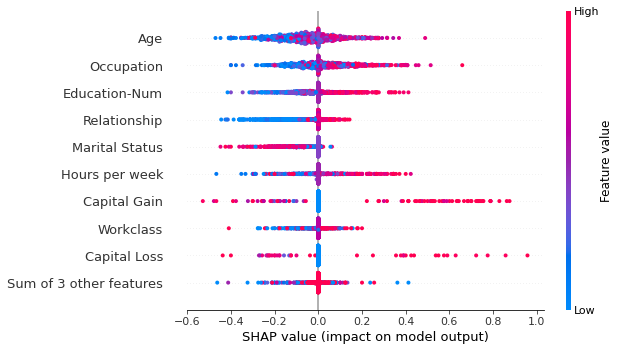

In [15]:
shap.plots.beeswarm(shap_values)

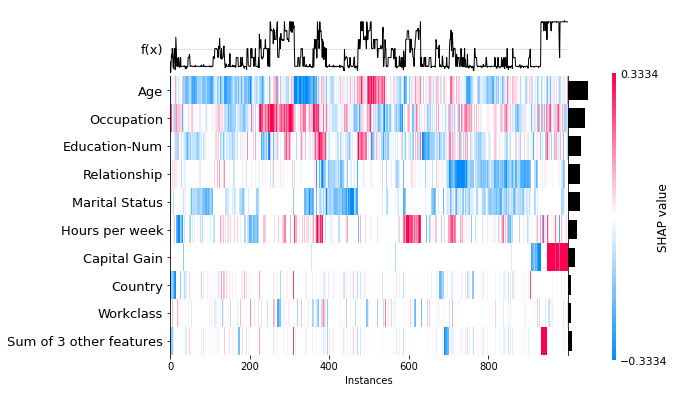

In [16]:
shap.plots.heatmap(shap_values)

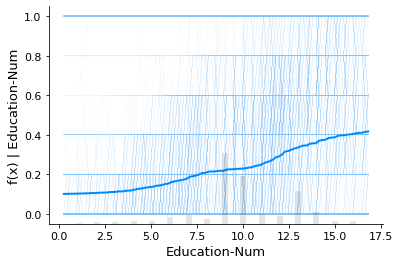

In [36]:
shap.plots.partial_dependence("Education-Num", predict_func, X_valid.iloc[:1000])

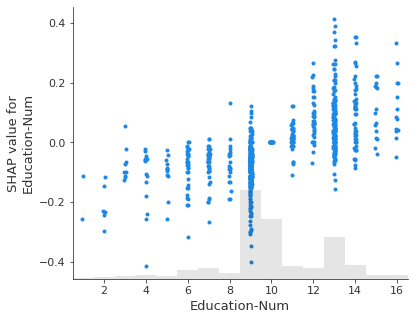

In [37]:
shap.plots.scatter(shap_values[:,"Education-Num"])

In [ ]:
explainer = shap.KernelExplainer(knn.predict_proba, X_train)
shap_values = explainer.shap_values(X_valid)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

Using 26048 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/6513 [00:00<?, ?it/s]

## Links
- https://blog.cloudera.com/ml-interpretability-lime-and-shap-in-prose-and-code/
- https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html